<a href="https://colab.research.google.com/github/Lemian5/DataSet/blob/main/Proyecto_Final_1_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# Cargar los datos desde la URL del archivo CSV
file_path = "https://raw.githubusercontent.com/Lemian5/DataSet/main/data.csv"
df = pd.read_csv(file_path)

In [ ]:
# Muestra los primeros registros
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Explorar el conjunto de datos
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Codificar las etiquetas categóricas si es necesario
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

In [ ]:
# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

In [ ]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Inicializar el clasificador (puedes probar con diferentes modelos)
clf = RandomForestClassifier()


In [ ]:
df = df.dropna()

In [ ]:
from sklearn.impute import SimpleImputer

# Crear un imputador simple
imputer = SimpleImputer(strategy='mean')

# Aplicar la imputación a las características
X = imputer.fit_transform(X)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Inicializar el clasificador
clf = HistGradientBoostingClassifier()

In [ ]:
# Realizar validación cruzada para evaluar el rendimiento del modelo
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Promedio de la precisión:", cv_scores.mean())

Cross-Validation Scores: [0.95604396 0.95604396 0.98901099 0.97802198 0.92307692]
Promedio de la precisión: 0.9604395604395606


In [ ]:
# Entrenar el modelo en el conjunto de entrenamiento completo
clf.fit(X_train, y_train)


HistGradientBoostingClassifier()

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

In [ ]:
# Evaluar el rendimiento del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud en el conjunto de prueba:", accuracy)

Exactitud en el conjunto de prueba: 0.9736842105263158


In [ ]:
# Mostrar métricas de clasificación detalladas
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
# Mostrar la matriz de confusión de manera más informativa
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[70  1]
 [ 2 41]]


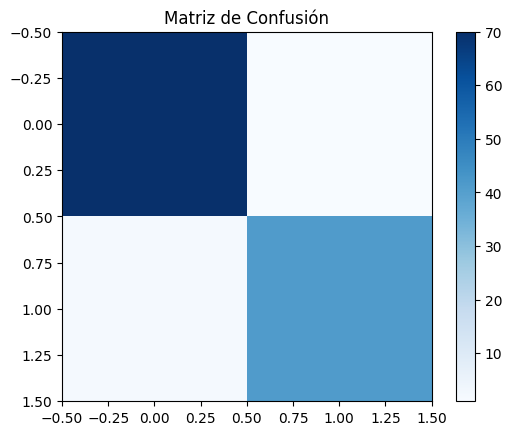

In [ ]:
# Visualizar la matriz de confusión de manera más informativa
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.colorbar()

([<matplotlib.axis.YTick at 0x791682c78d30>,
 [Text(0, 0, 'B'), Text(0, 1, 'M')])

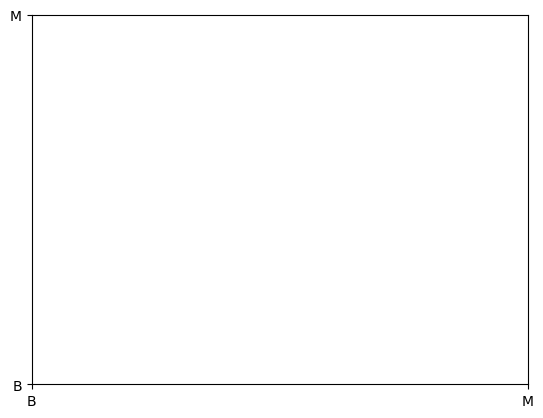

In [ ]:
# Ajustar el formato de las etiquetas de los ejes
plt.xticks(ticks=[0, 1], labels=label_encoder.classes_)
plt.yticks(ticks=[0, 1], labels=label_encoder.classes_)

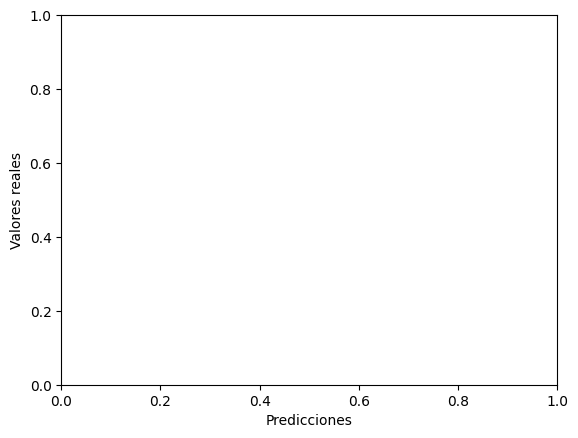

In [ ]:
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.show()